# Object Detection Tutorial

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" /> Download notebook</a>
  </td>
</table>

### Start EVA server

We are reusing the start server notebook for launching the EVA server.

In [9]:
!wget -nc "https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/00-start-eva-server.ipynb"
%run 00-start-eva-server.ipynb
cursor = connect_to_server()

File '00-start-eva-server.ipynb' already there; not retrieving.

Note: you may need to restart the kernel to use updated packages.
nohup eva_server > eva.log 2>&1 &
Note: you may need to restart the kernel to use updated packages.


### Download the Videos

In [10]:
# Getting the video files
!wget -nc https://www.dropbox.com/s/k00wge9exwkfxz6/ua_detrac.mp4?raw=1 -O ua_detrac.mp4

File 'ua_detrac.mp4' already there; not retrieving.


### Load the surveillance videos for analysis

##### We use regular expression to load all the videos into the table

In [12]:
cursor.execute('DROP TABLE IF EXISTS ObjectDetectionVideos')
response = cursor.fetch_all()
print(response)
cursor.execute('LOAD VIDEO "ua_detrac.mp4" INTO ObjectDetectionVideos;')
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                                    0
0  Table Successfully dropped: ObjectDetectionVideos
@query_time: 0.040912775322794914
@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded VIDEO: 1
@query_time: 0.08603794313967228


### Visualize Video

In [13]:
from IPython.display import Video
Video("ua_detrac.mp4", embed=True)

### Register YOLO Object Detector an an User-Defined Function (UDF) in EVA 

In [15]:

cursor.execute("""
            CREATE UDF IF NOT EXISTS Yolo
            TYPE  ultralytics
            'model' 'yolov8m.pt';
      """)
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                               0
0  UDF Yolo successfully added to the database.
@query_time: 2.0593097619712353


### Run Object Detector on the video

In [16]:
cursor.execute("""SELECT id, Yolo(data)
                  FROM ObjectDetectionVideos 
                  WHERE id < 20""")
response = cursor.fetch_all()
response.as_df()

,objectdetectionvideos.id,yolo.labels,yolo.bboxes,yolo.scores
0,0,"[car, car, car, car, car, car, person, car, ca...","[[828.603515625, 277.01861572265625, 959.62792...","[0.91, 0.86, 0.85, 0.83, 0.76, 0.73, 0.72, 0.7..."
1,1,"[car, car, car, car, car, car, car, car, car, ...","[[832.1552734375, 278.1466064453125, 959.63830...","[0.92, 0.85, 0.84, 0.83, 0.78, 0.76, 0.76, 0.7..."
2,2,"[car, car, car, car, car, car, car, person, ca...","[[835.5642700195312, 279.1689147949219, 959.64...","[0.92, 0.84, 0.84, 0.82, 0.81, 0.75, 0.73, 0.7..."
3,3,"[car, car, car, car, car, car, car, car, car, ...","[[839.2291259765625, 279.876953125, 959.635620...","[0.91, 0.84, 0.82, 0.8, 0.8, 0.75, 0.74, 0.72,..."
4,4,"[car, car, car, car, car, car, car, car, car, ...","[[843.063232421875, 280.84881591796875, 959.62...","[0.9, 0.85, 0.83, 0.8, 0.76, 0.73, 0.72, 0.72,..."
5,5,"[car, car, car, car, car, car, person, car, ca...","[[847.2269897460938, 282.40478515625, 959.6654...","[0.89, 0.86, 0.84, 0.8, 0.78, 0.74, 0.72, 0.72..."
6,6,"[car, car, car, car, car, car, car, person, ca...","[[850.6966552734375, 283.1654052734375, 959.43...","[0.89, 0.87, 0.85, 0.81, 0.79, 0.73, 0.72, 0.7..."
7,7,"[car, car, car, car, car, car, car, car, car, ...","[[854.817626953125, 283.79345703125, 959.55505...","[0.9, 0.87, 0.84, 0.83, 0.83, 0.79, 0.73, 0.67..."
8,8,"[car, car, car, car, car, car, person, car, ca...","[[859.06787109375, 285.23321533203125, 959.824...","[0.89, 0.88, 0.83, 0.82, 0.79, 0.71, 0.68, 0.6..."
9,9,"[car, car, car, car, car, car, car, person, ca...","[[862.5375366210938, 286.3861083984375, 959.53...","[0.88, 0.87, 0.84, 0.82, 0.8, 0.75, 0.74, 0.74..."


### Visualizing output of the Object Detector on the video

In [17]:
import cv2
from pprint import pprint
from matplotlib import pyplot as plt

def annotate_video(detections, input_video_path, output_video_path):
    color1=(207, 248, 64)
    color2=(255, 49, 49)
    thickness=4

    vcap = cv2.VideoCapture(input_video_path)
    width = int(vcap.get(3))
    height = int(vcap.get(4))
    fps = vcap.get(5)
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') #codec
    video=cv2.VideoWriter(output_video_path, fourcc, fps, (width,height))

    frame_id = 0
    # Capture frame-by-frame
    # ret = 1 if the video is captured; frame is the image
    ret, frame = vcap.read() 

    while ret:
        df = detections
        df = df[['yolo.bboxes', 'yolo.labels']][df.index == frame_id]
        if df.size:
            dfLst = df.values.tolist()
            for bbox, label in zip(dfLst[0][0], dfLst[0][1]):
                x1, y1, x2, y2 = bbox
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                # object bbox
                frame=cv2.rectangle(frame, (x1, y1), (x2, y2), color1, thickness) 
                # object label
                cv2.putText(frame, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color1, thickness) 
                # frame label
                cv2.putText(frame, 'Frame ID: ' + str(frame_id), (700, 500), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color2, thickness) 
            video.write(frame)

            # Stop after twenty frames (id < 20 in previous query)
            if frame_id == 20:
                break

            # Show every fifth frame
            if frame_id % 5 == 0:
                plt.imshow(frame)
                plt.show()

        
        frame_id+=1
        ret, frame = vcap.read()

    video.release()
    vcap.release()

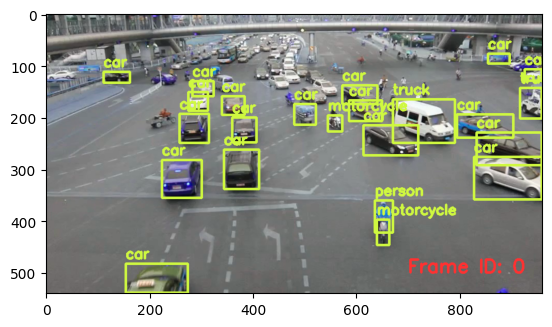

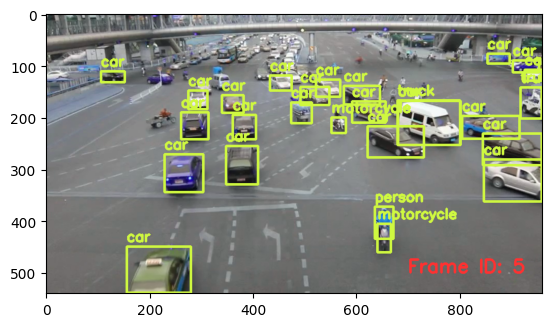

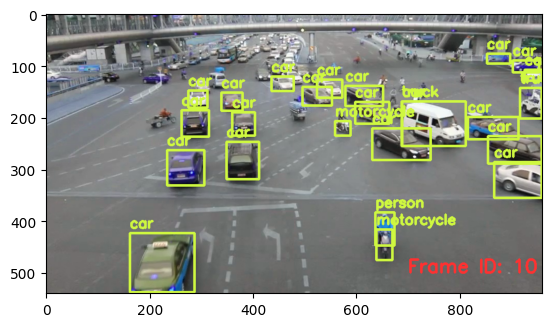

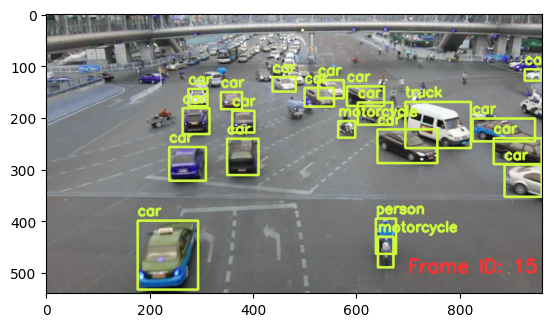

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\t5X...')

In [18]:
from ipywidgets import Video, Image
input_path = 'ua_detrac.mp4'
output_path = 'video.mp4'

dataframe = response.as_df()
annotate_video(dataframe, input_path, output_path)
Video.from_file(output_path)

### Dropping an User-Defined Function (UDF)

In [19]:
cursor.execute("DROP UDF Yolo;")
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                0
0  UDF Yolo successfully dropped
@query_time: 0.037336623296141624
